## Objetivo del módulo

1. Conocer lo que es un spanning tree y los algoritmos con los cuales se construye spanning tree de costo mínimo en grafos no dirigidos.

2. Determinar la distancia mínima y el camino más corto para ir desde un vértice hacia los demás en grafos dirigidos.

## Preguntas

- ¿Qué es un spanning tree?
- ¿Para qué se utiliza el algoritmo de Kruskal?
- ¿Para qué se utiliza el algoritmo de Prim?
- ¿Para qué se utiliza el algoritmo de Dijkstra?
- ¿Para qué se utiliza el algoritmo de Floyd?
- ¿Para qué se utiliza el algoritmo de Warshall?


## Generación aleatoria de grafos

Observa el código siguiente para entender cómo generamos grafos de manera aleatoria de forma que:

- los nodos tienen una **posición**
- los lados tienen un **peso**


Generando grafos de esta manera podemos experimentar y construir las intuiciones de los algoritmos que estamos tratando.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [750]:
def create_random_graph(directed=False, w_size=200, n_cities=7, prob_connected=0.5):
    import itertools
    cities = (np.random.random((n_cities,2))*w_size).astype(int)
    g = nx.DiGraph() if directed else nx.Graph()
    
    for node_id, location in enumerate(cities):
        g.add_node(node_id, pos=location)
    for i,j in itertools.product(range(len(cities)), range(len(cities))):
        if i<j and np.random.random()<prob_connected:
            g.add_edge(i,j,weight=np.round(np.linalg.norm(cities[i]-cities[j]),2))    
            if directed and np.random.random()>.5:
                g.add_edge(j,i,weight=np.round(np.linalg.norm(cities[i]-cities[j]),2))    
                
    return g

def draw_graph(g,node_size=500, font_color="white", 
               show_edge_labels=True, edge_units=" km",
               x_units="km lon", y_units="km lat"):
    positions = {i: g.nodes[i]["pos"] for i in g.nodes} if "pos" in g.nodes.values()[0].keys() else None
    nx.drawing.draw(g, with_labels=True, pos=positions,
                    node_alpha=.5, node_color="blue", width=2,
                    node_size=node_size, font_color=font_color)   
    if show_edge_labels and positions is not None:
        nx.draw_networkx_edge_labels(g, pos=positions,
                                     edge_labels={i:"%.1f%s"%(g.get_edge_data(*i)["weight"],edge_units) for i in g.edges});
        plt.axis("on")
        plt.xlabel(x_units)
        plt.ylabel(y_units)
        plt.grid()
    plt.axis("equal");

observa cómo con estas funciones creamos y visualizamos un grafo aleatorio. Experimenta con los parámetros para entender qué tipos de grafos puedes generar.

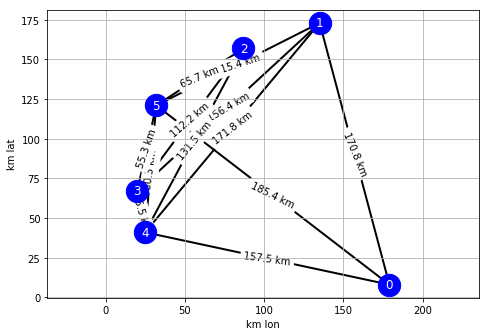

In [751]:
g = create_random_graph(n_cities=6, prob_connected=.9)
draw_graph(g)


## Spanning tree

**DEFINIR SPANNING TREE**  cableado

## Algoritmo de Kruskal para la obtención del spanning tree de costo mínimo (_MST_)

**INPUT**: 
- `E`: lista de lados (_edges_) del grafo ordenada ascendientemente por coste
- `Vset`: lista de conjuntos unitarios con los vértices (_nodes_) del grafo.

**PSEUDOCÓDIGO**

        1.      st = {}
        2.      para cada lado en E
        3.		        si lado (u, w) no forma ciclo en st
        4.		                 incluír lado (u, w) en st
        5.			     unir en Vset los subconjuntos que contenga a u y a w


**OUTPUT**:
- `st`: lista de lados (_edges_) que conforman el MST

In [679]:
def get_mst(g, illustrate=False):
    sorted_edges = [tuple(i) for i in np.r_[[i for i in g.edges]][np.argsort([g.edges[i]["weight"] for i in g.edges])]]
    vsets = [set([i]) for i in g.nodes]

    # --- begin cosmetics ----
    if illustrate:
        print "starting vsets", ", ".join(["{"+",".join([str(i) for i in s])+"}" for s in vsets])
        xs = [i["pos"][0] for i in g.nodes.itervalues()]
        ys = [i["pos"][1] for i in g.nodes.itervalues()]   
        xr = np.max(xs) - np.min(xs)
        yr = np.max(ys) - np.min(ys)
        print xr, xs
    # --- end cosmetics ----
        
    st = []
    for step_nb, edge in enumerate(sorted_edges):

        n0,n1 = edge

        # check no cycles: both n0 and n1 are NOT in the same set        
        if sum([n0 in s and n1 in s for s in vsets])>0:
            continue

        # add edge to spanning tree
        st.append(edge)

        # makes the union of all sets containing n1 or n0
        containing = [i for i in vsets if n0 in i or n1 in i]
        containing = containing[0].union(*containing[1:])
        not_containing = [i for i in vsets if not n0 in i and not n1 in i]
        vsets = [containing] + not_containing  

        # --- begin cosmetics ----
        if illustrate:
            plt.figure(figsize=(2,2))
            draw_graph(g.edge_subgraph(st), node_size=200, show_edge_labels=False)
            str_vsets = ", ".join(["{"+",".join([str(i) for i in s])+"}" for s in vsets])
            plt.title("step %d"%step_nb+"   edge "+str(edge)+"\nvsets: "+str_vsets)
            plt.grid()
            plt.axis("tight")
            plt.xlim(np.min(xs)-xr*.1, np.max(xs)+xr*.1)
            plt.ylim(np.min(ys)-yr*.1, np.max(ys)+yr*.1)
        # --- end cosmetics ----
                        
    return g.edge_subgraph(st)


In [680]:
xs = [i["pos"][0] for i in g.nodes.itervalues()]
ys = [i["pos"][1] for i in g.nodes.itervalues()]

creamos un grafo que nosotros definimos o generamos uno aleatorio

In [681]:
g = nx.Graph()
g.add_node(1, pos=(0,10))
g.add_node(2, pos=(0,0))
g.add_node(3, pos=(10,10))
g.add_node(4, pos=(10,0))
g.add_node(5, pos=(15,5))

g.add_edge(1,2, weight=1)
g.add_edge(1,3, weight=4)
g.add_edge(1,4, weight=3)
g.add_edge(2,3, weight=6)
g.add_edge(2,4, weight=2)
g.add_edge(3,4, weight=5)
g.add_edge(3,5, weight=7)
g.add_edge(4,5, weight=8)

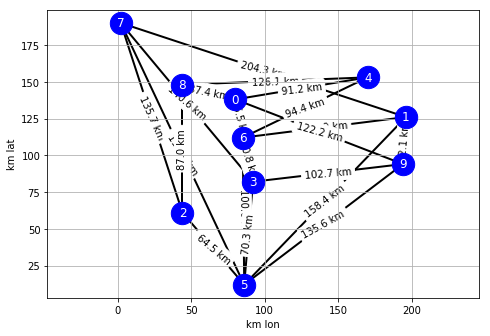

In [685]:
## DESCOMENTA LA SIGUIENTE LINEA SI QUIERES USAR UN GRAFO ALEATORIO
g = create_random_graph(n_cities=10, prob_connected=.6)
draw_graph(g)

obtenermos el MST (con nuestro algoritmo y con `networkx`)

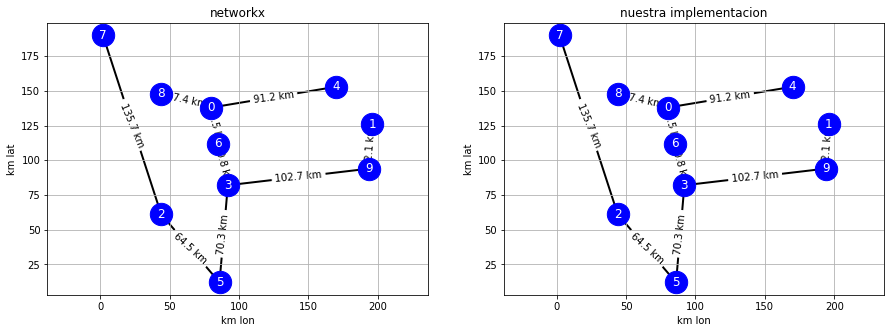

In [686]:
n_mst = nx.minimum_spanning_tree(g)
g_mst = get_mst(g)

plt.figure(figsize=(15,5))
plt.subplot(121)
draw_graph(n_mst)
plt.title("networkx")
plt.subplot(122)
draw_graph(g_mst)
plt.title("nuestra implementacion");

vemos el paso a paso que hace nuestro algoritmo

starting vsets {0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}
194 [80, 196, 44, 92, 170, 86, 85, 2, 44, 194]


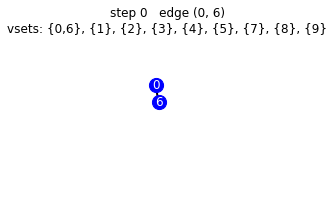

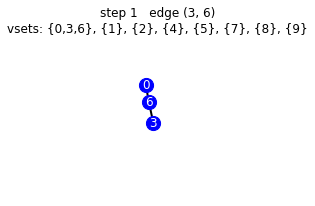

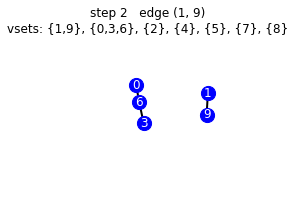

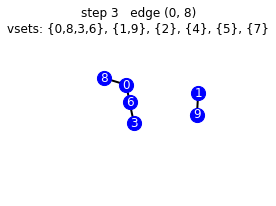

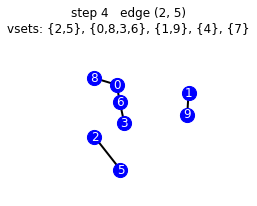

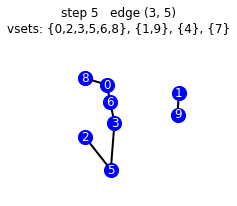

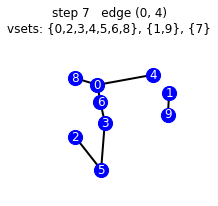

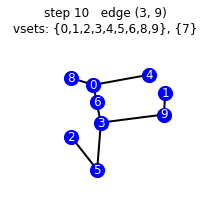

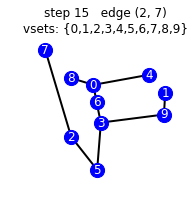

In [687]:
g_mst = get_mst(g, illustrate=True)

## Obtención de distancias y recorridos mínimos

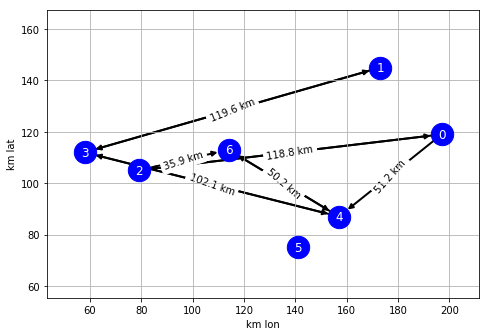

In [713]:
g = create_random_graph(n_cities=7, prob_connected=.2, directed=True)
draw_graph(g)

### Dijkstra shortest path

observa los distintos métodos que tiene `network` alrededor del [Algoritmo de Dijkstra](https://es.wikipedia.org/wiki/Algoritmo_de_Dijkstra)

In [723]:
source, target = 0,1
print "shortest route from",source,"to",target
print nx.dijkstra_path(g, source, target)
print "\nshortest route length from",source,"to",target
print nx.dijkstra_path_length(g, source, target)
pred, dist = nx.dijkstra_predecessor_and_distance(g, source)
print "\npredecessors to",source
print pred
print "\ndistances to predecessors to", source
print dist

shortest route from 0 to 1
[0, 4, 3, 1]

shortest route length from 0 to 1
272.96999999999997

predecessors to 0
{0: [], 1: [3], 2: [0], 3: [4], 4: [0], 6: [4]}

distances to predecessors to 0
{0: 0, 1: 272.96999999999997, 2: 118.83, 3: 153.32999999999998, 4: 51.22, 6: 101.47}


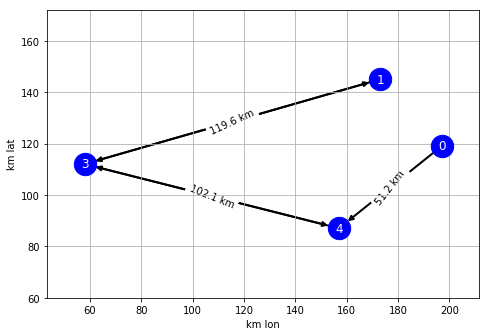

In [724]:
dpath = nx.dijkstra_path(g, source, target)
draw_graph(g.subgraph(dpath))


### intuición del algoritmo de Dijsktra

consideremos el siguiente grafo

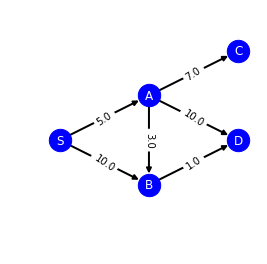

In [756]:
g = nx.DiGraph()
g.add_node("S", pos=(0,5))
g.add_node("A", pos=(10,10))
g.add_node("B", pos=(10,0))
g.add_node("C", pos=(20,15))
g.add_node("D", pos=(20,5))

g.add_edge("S","A", weight=5)
g.add_edge("S","B", weight=10)
g.add_edge("A","B", weight=3)
g.add_edge("A","C", weight=7)
g.add_edge("A","D", weight=10)
g.add_edge("B","D", weight=1)

plt.figure(figsize=(3,3))
draw_graph(g, edge_units="")
plt.axis("off");

queremos obtener la distancia más corta para ir **desde el nodo S al D**

1. Examinamos todos los lados que parten del nodo S

1. **Inferimos** que la distancia más corta para llegar al nodo A desde el nodo S es de 5 ya que:
   - el nodo S solo tiene dos salidas (a través del nodo A y a través del nodo B)
   - si saliéramos a través del nodo B para llegar al A, empezaríamos con un coste de 10
   - pero el camino S $\rightarrow$ A tiene un coste de 5km 
   - esto **garantiza** que el camino más corto entre S y A es de 5km

1. Todavía **no podemos saber** cual es la distancia más corta para llegar a D ya que a D se puede llegar también por B y no sabemos la distancia más corta para llegar a B.

1. **Inferimos** que la distancia más corta para llegar a B es de 8 ya que:
   - al nodo B sólo se puede llegar desde A o S.
   - ya **sabemos** cual es la distancia más corta por la que se puede llegar a A o S
   - Pasando por A, el camino hasta B desde S es de 8km
   - Directamente desde S, el camino es de 10km
 
1. ahora ya podemos **inferir** que la distancia más corta para llegar a D es de 9km ya que:
   - **sabemos** que la distancia más corta para llegar a A es de 5km, y desde ahí hasta D tenemos 10km más.
   - **sabemos** que la distancia más corta para llegar a B es de 8km, y desde ahí hasta D tenemos 1km más.
   - no hay más formas de llegar a D
   

## Algoritmo de Floyd Warshall

El [Algoritmo de Floyd Warshall](https://es.wikipedia.org/wiki/Algoritmo_de_Floyd-Warshall) genera las distancias más cortas entre todos los pares de nodos. Observa las distintas versiones del mismo que proporciona `networkx`

In [726]:
k = nx.floyd_warshall_numpy(g)
print k

[[  0.   272.97 118.83 153.33  51.22    inf 101.47]
 [   inf   0.      inf 119.64 221.75    inf 272.  ]
 [118.83 307.9    0.   188.26  86.15    inf  35.9 ]
 [   inf 119.64    inf   0.   102.11    inf 152.36]
 [   inf 221.75    inf 102.11   0.      inf  50.25]
 [   inf    inf    inf    inf    inf   0.      inf]
 [   inf 272.      inf 152.36  50.25    inf   0.  ]]


In [727]:
k = nx.floyd_warshall(g)
k

{0: defaultdict(<function networkx.algorithms.shortest_paths.dense.<lambda>>,
             {0: 0,
              1: 272.97,
              2: 118.83,
              3: 153.32999999999998,
              4: 51.22,
              5: inf,
              6: 101.47}),
 1: defaultdict(<function networkx.algorithms.shortest_paths.dense.<lambda>>,
             {0: inf, 1: 0, 2: inf, 3: 119.64, 4: 221.75, 5: inf, 6: 272.0}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.<lambda>>,
             {0: 118.83,
              1: 307.9,
              2: 0,
              3: 188.26000000000002,
              4: 86.15,
              5: inf,
              6: 35.9}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.<lambda>>,
             {0: inf, 1: 119.64, 2: inf, 3: 0, 4: 102.11, 5: inf, 6: 152.36}),
 4: defaultdict(<function networkx.algorithms.shortest_paths.dense.<lambda>>,
             {0: inf, 1: 221.75, 2: inf, 3: 102.11, 4: 0, 5: inf, 6: 50.25}),
 5: defaultdict(<f

In [730]:
preds, distances = nx.floyd_warshall_predecessor_and_distance(g)
print "\npredecessors"
print preds
print "\ndistances"
print distances


predecessors
{0: {1: 3, 2: 0, 3: 4, 4: 0, 6: 4}, 1: {3: 1, 4: 3, 6: 4}, 2: {0: 2, 1: 3, 3: 4, 4: 6, 6: 2}, 3: {1: 3, 4: 3, 6: 4}, 4: {1: 3, 3: 4, 6: 4}, 6: {1: 3, 3: 4, 4: 6}}

distances
{0: defaultdict(<function <lambda> at 0xa188cbb18>, {0: 0, 1: 272.97, 2: 118.83, 3: 153.32999999999998, 4: 51.22, 5: inf, 6: 101.47}), 1: defaultdict(<function <lambda> at 0xa188cbaa0>, {0: inf, 1: 0, 2: inf, 3: 119.64, 4: 221.75, 5: inf, 6: 272.0}), 2: defaultdict(<function <lambda> at 0xa188cba28>, {0: 118.83, 1: 307.9, 2: 0, 3: 188.26000000000002, 4: 86.15, 5: inf, 6: 35.9}), 3: defaultdict(<function <lambda> at 0xa188cb9b0>, {0: inf, 1: 119.64, 2: inf, 3: 0, 4: 102.11, 5: inf, 6: 152.36}), 4: defaultdict(<function <lambda> at 0xa188cb938>, {0: inf, 1: 221.75, 2: inf, 3: 102.11, 4: 0, 5: inf, 6: 50.25}), 5: defaultdict(<function <lambda> at 0xa188cb8c0>, {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: 0, 6: inf}), 6: defaultdict(<function <lambda> at 0xa188cb848>, {0: inf, 1: 272.0, 2: inf, 3: 152.36, 